In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import math
import time
import random
import datetime
import operator

In [3]:
confirmed_df=pd.read_csv("confirmed_corona.csv")
deaths_df=pd.read_csv("deaths_corona.csv")
recoveries_df=pd.read_csv("recoveries_corona.csv")
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv')
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-30 22:52:45,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-30 22:52:45,30.295065,-92.414197,11,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-30 22:52:45,37.767072,-75.632346,6,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-30 22:52:45,43.452658,-116.241552,113,2,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-30 22:52:45,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [5]:
cols=confirmed_df.keys()

In [6]:
confirmed=confirmed_df.loc[:,cols[4]:cols[-1]]
deaths=deaths_df.loc[:,cols[4]:cols[-1]]
recoveries=recoveries_df.loc[:,cols[4]:cols[-1]]

In [7]:
dates=confirmed.keys()
world_confirmed_cases=[]
world_death_cases=[]
world_recovery_cases=[]
world_active_cases=[]
mortality_rate=[]
recovery_rate=[]
china_cases=[]
usa_cases=[]
spain_cases=[]
italy_cases=[]
for i in dates:
    confirmed_sum=confirmed[i].sum()
    deaths_sum=deaths[i].sum()
    recoveries_sum=recoveries[i].sum()
    
    #cases all over the world
    world_confirmed_cases.append(confirmed_sum)
    world_death_cases.append(deaths_sum)
    world_recovery_cases.append(recoveries_sum)
    world_active_cases.append(confirmed_sum-(deaths_sum+recoveries_sum))
    #rate of case
    mortality_rate.append(deaths_sum/confirmed_sum)
    recovery_rate.append(recoveries_sum/confirmed_sum)
    #cases in individual country
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    usa_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())

In [8]:
#Daily Increase
def daily_increase(data):
    d=[]
    for i in range(len(data)):
        if i==0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d
world_daily_increase=daily_increase(world_confirmed_cases)
china_daily_increase=daily_increase(china_cases)
italy_daily_increase=daily_increase(italy_cases)
usa_daily_increase=daily_increase(usa_cases)
spain_daily_increase=daily_increase(spain_cases)

In [9]:
date_since_22_1=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_confirmed_cases=np.array(world_confirmed_cases).reshape(-1,1)
world_death_cases=np.array(world_death_cases).reshape(-1,1)
world_recovery_cases=np.array(world_recovery_cases).reshape(-1,1)

In [10]:
#future forecasting
days_in_future=10
future_dates=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_dates[:-10]
#adjusted_dates.reshape(-1,1)

In [11]:
#converting integers to date and time
start='1/22/2020'
start_date=datetime.datetime.strptime(start, "%m/%d/%Y" )
future_forecast=[]
for i in range(len(future_dates)):
    future_forecast.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


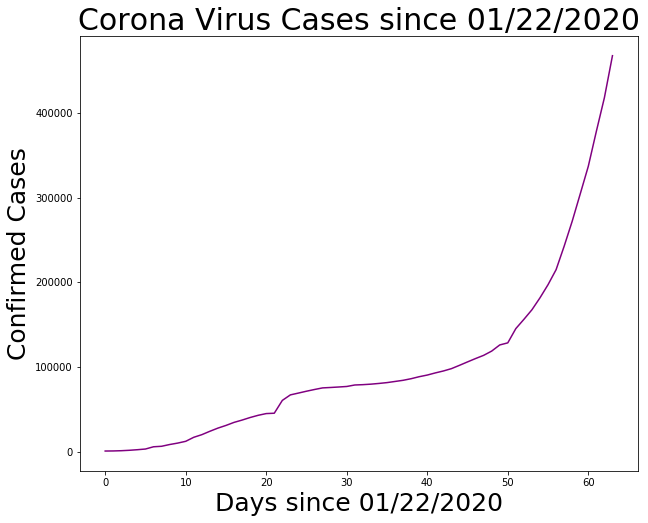

In [12]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,world_confirmed_cases,color='purple')
plt.title("Corona Virus Cases since 01/22/2020",size=30)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Confirmed Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

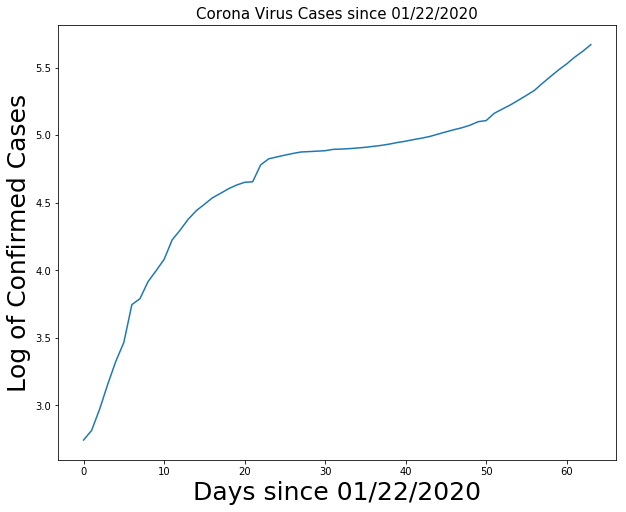

In [13]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,np.log10(world_confirmed_cases))
plt.title("Corona Virus Cases since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Log of Confirmed Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

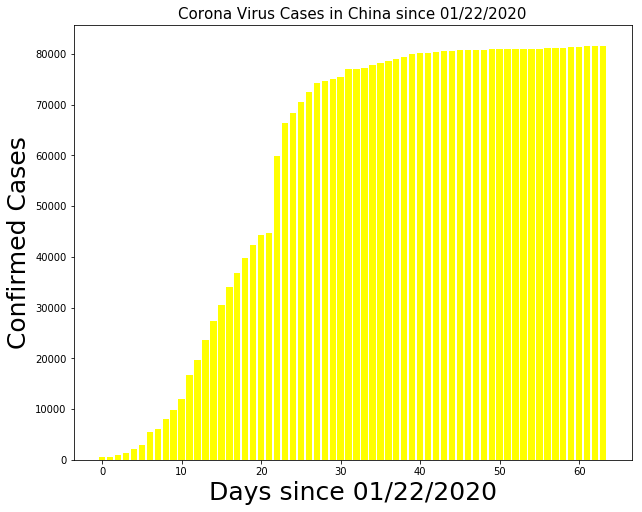

In [14]:
plt.figure(figsize=(10,8))
plt.bar(adjusted_dates,china_cases,color='yellow')
plt.title("Corona Virus Cases in China since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Confirmed Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


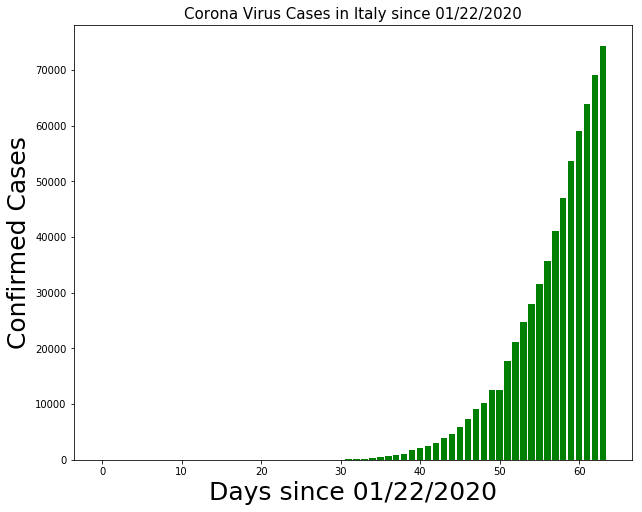

In [15]:
plt.figure(figsize=(10,8))
plt.bar(adjusted_dates,italy_cases,color='green')
plt.title("Corona Virus Cases in Italy since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Confirmed Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

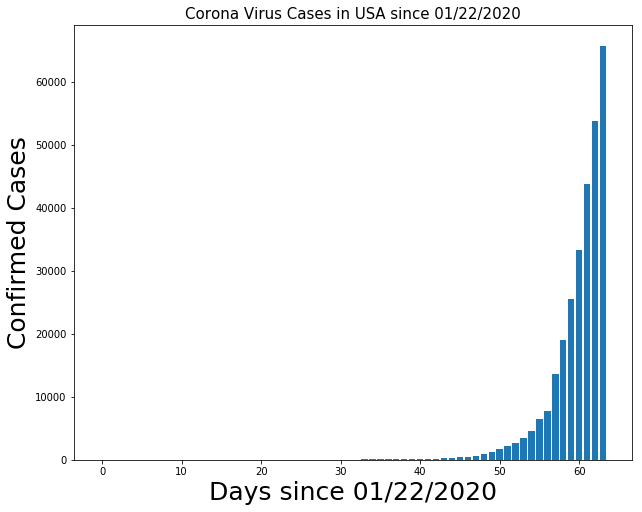

In [16]:
plt.figure(figsize=(10,8))
plt.bar(adjusted_dates,usa_cases)
plt.title("Corona Virus Cases in USA since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Confirmed Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

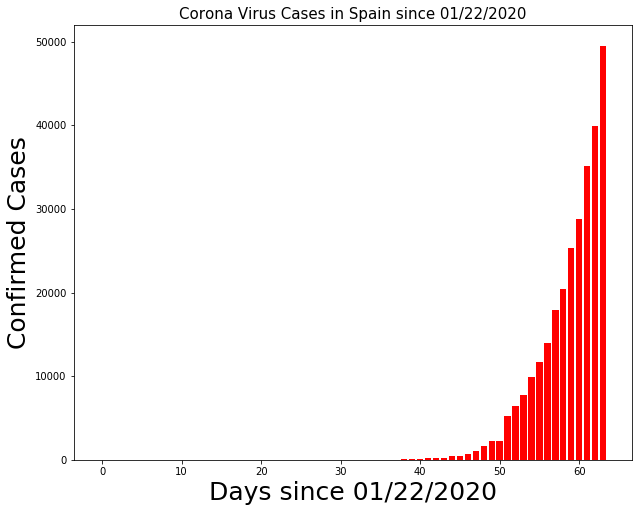

In [17]:
plt.figure(figsize=(10,8))
plt.bar(adjusted_dates,spain_cases,color='red')
plt.title("Corona Virus Cases in Spain since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Confirmed Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

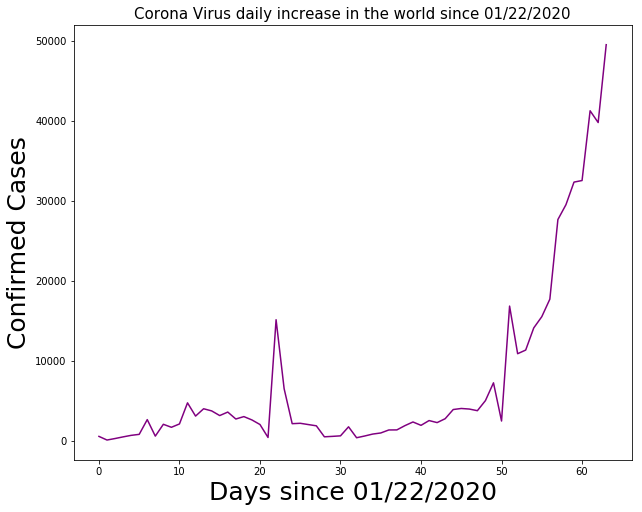

In [18]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,world_daily_increase,color='purple')
plt.title("Corona Virus daily increase in the world since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Confirmed Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

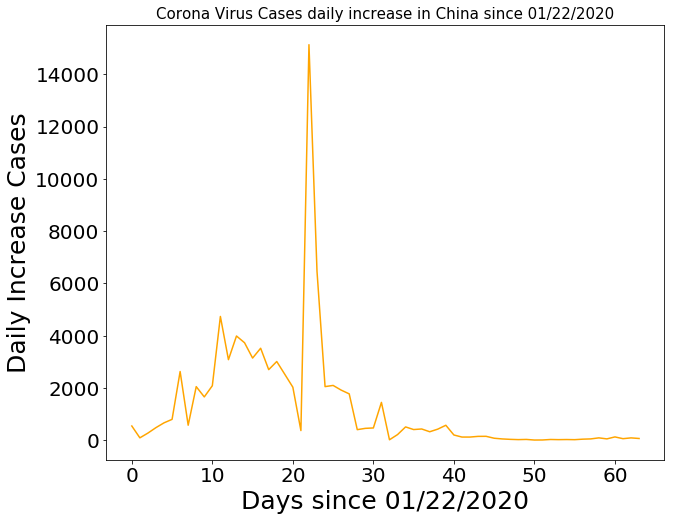

In [19]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,china_daily_increase,color='orange')
plt.title("Corona Virus Cases daily increase in China since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Daily Increase Cases",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

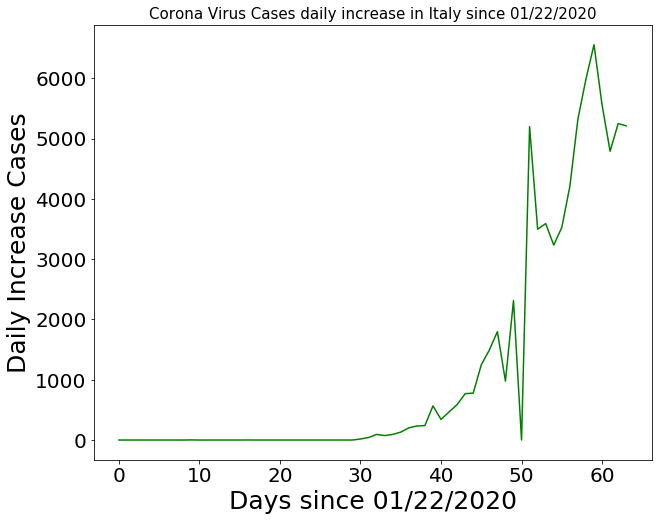

In [20]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,italy_daily_increase,color='green')
plt.title("Corona Virus Cases daily increase in Italy since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Daily Increase Cases",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

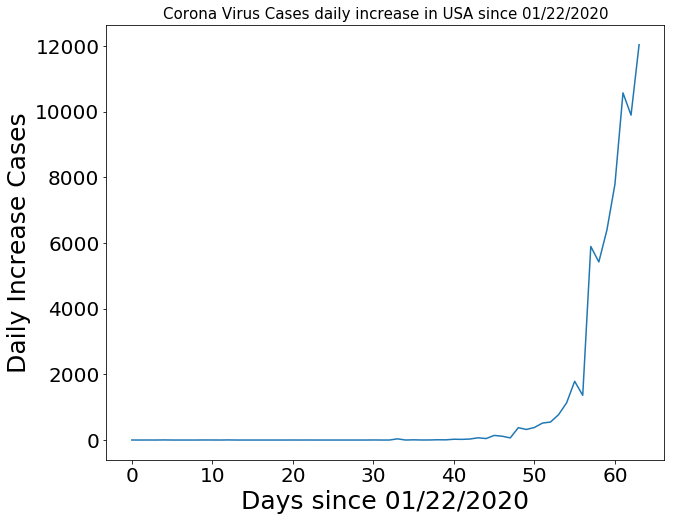

In [21]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,usa_daily_increase)
plt.title("Corona Virus Cases daily increase in USA since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Daily Increase Cases",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

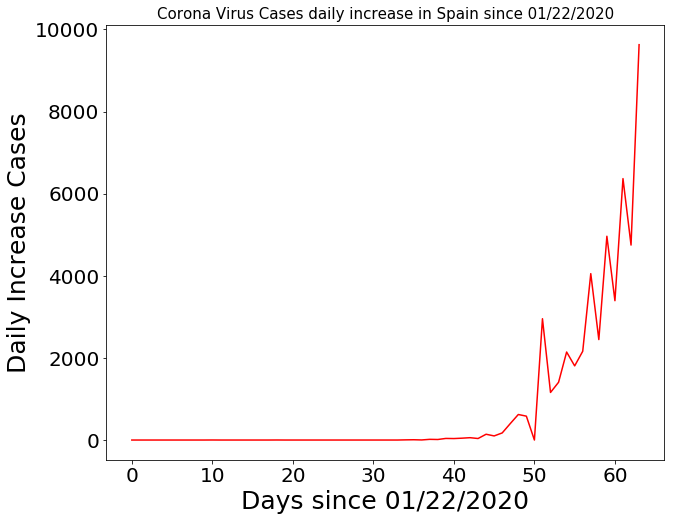

In [22]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,spain_daily_increase,color='red')
plt.title("Corona Virus Cases daily increase in Spain since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Daily Increase Cases",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

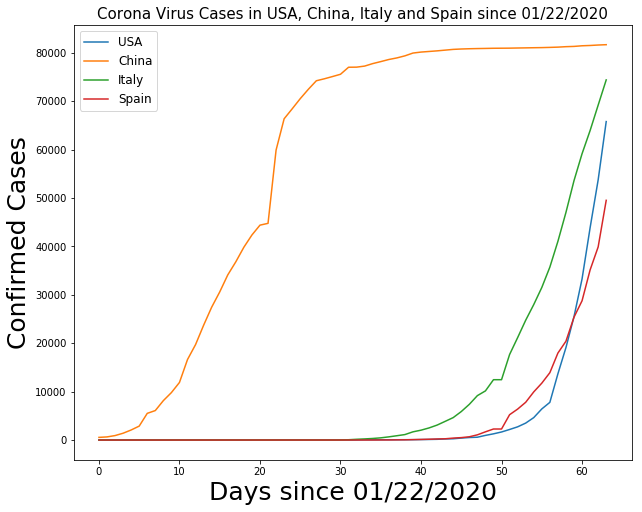

In [23]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,usa_cases)
plt.plot(adjusted_dates,china_cases)
plt.plot(adjusted_dates,italy_cases)
plt.plot(adjusted_dates,spain_cases)
plt.title("Corona Virus Cases in USA, China, Italy and Spain since 01/22/2020",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Confirmed Cases",size=25)
plt.legend(['USA','China','Italy','Spain'],prop={'size':12})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

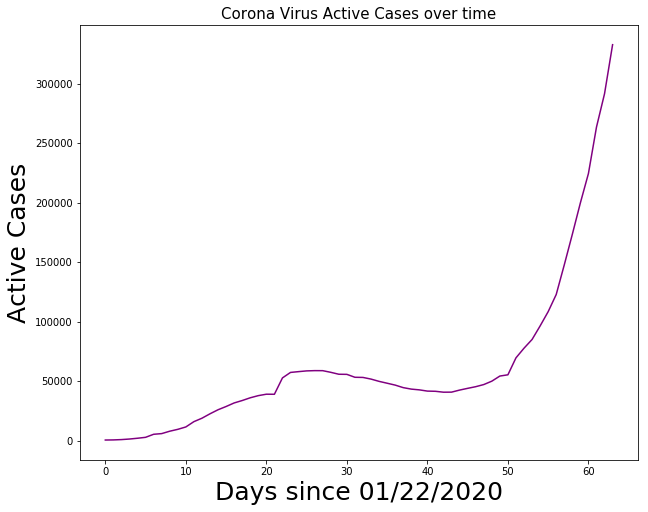

In [24]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,world_active_cases,color='purple')
plt.title("Corona Virus Active Cases over time",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Active Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

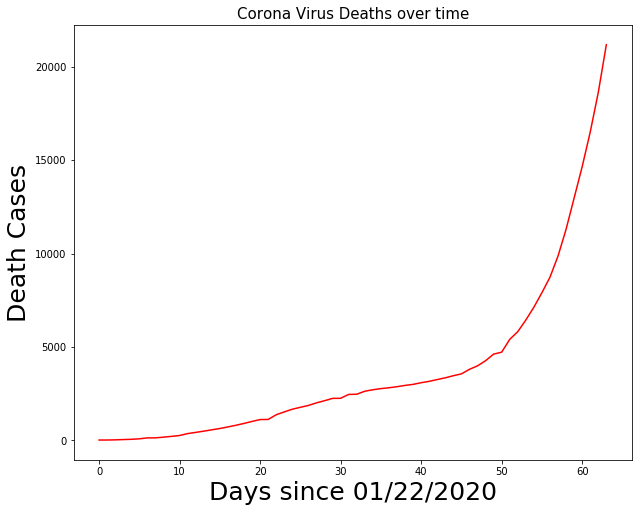

In [25]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,world_death_cases,color='red')
plt.title("Corona Virus Deaths over time",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Death Cases",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

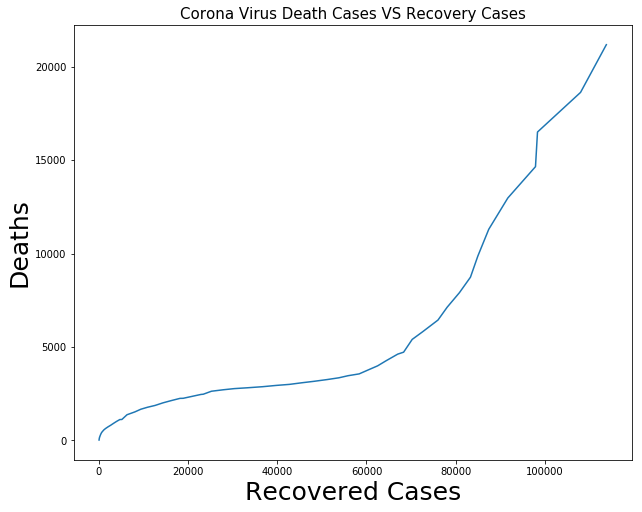

In [26]:
plt.figure(figsize=(10,8))
plt.plot(world_recovery_cases,world_death_cases)
plt.title("Corona Virus Death Cases VS Recovery Cases",size=15)
plt.xlabel("Recovered Cases",size=25)
plt.ylabel("Deaths",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

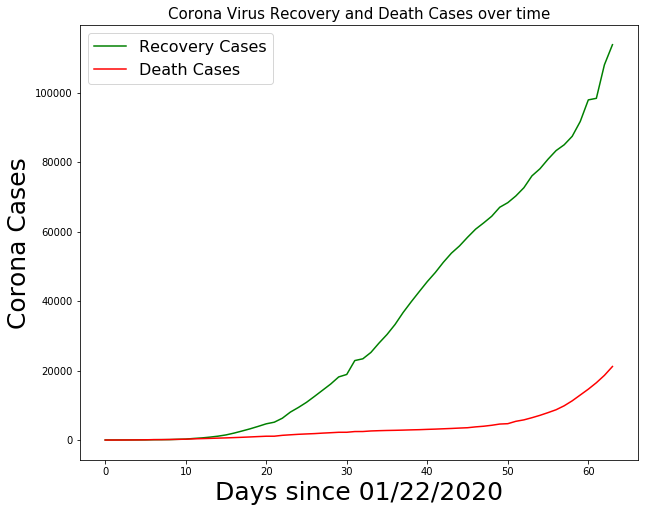

In [27]:
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,world_recovery_cases,color='g')
plt.plot(adjusted_dates,world_death_cases,color='r')
plt.title("Corona Virus Recovery and Death Cases over time",size=15)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Corona Cases",size=25)
plt.legend(['Recovery Cases','Death Cases'],prop={'size':16})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

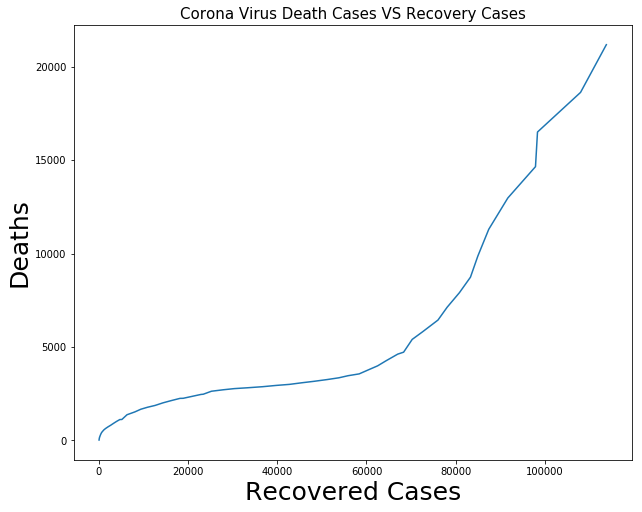

In [28]:
plt.figure(figsize=(10,8))
plt.plot(world_recovery_cases,world_death_cases)
plt.title("Corona Virus Death Cases VS Recovery Cases",size=15)
plt.xlabel("Recovered Cases",size=25)
plt.ylabel("Deaths",size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

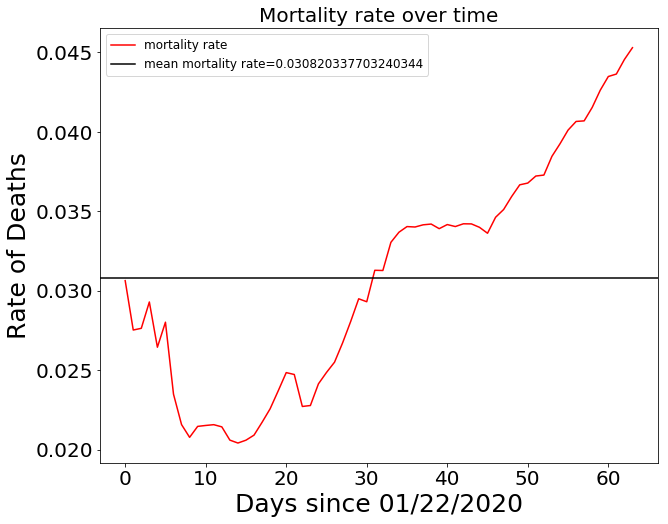

In [29]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,mortality_rate,color='red')
plt.axhline(y=mean_mortality_rate,linestyle='-',color='black')
plt.title("Mortality rate over time",size=20)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Rate of Deaths",size=25)
plt.legend(['mortality rate','mean mortality rate='+str(mean_mortality_rate)],prop={'size':12})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

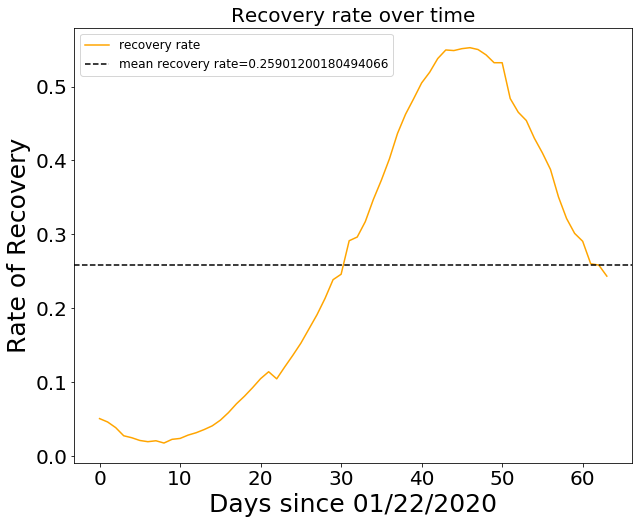

In [30]:
mean_recovery_rate=np.mean(recovery_rate)
plt.figure(figsize=(10,8))
plt.plot(adjusted_dates,recovery_rate,color='orange')
plt.axhline(y=mean_recovery_rate,linestyle='--',color='black')
plt.title("Recovery rate over time",size=20)
plt.xlabel("Days since 01/22/2020",size=25)
plt.ylabel("Rate of Recovery",size=25)
plt.legend(['recovery rate','mean recovery rate='+str(mean_recovery_rate)],prop={'size':12})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [31]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [37]:
country_confirmed_cases=[]
country_death_cases=[]
country_recovery_cases=[]
country_mortality_rate=[]
country_recovery_rate=[]
no_cases=[]
for i in unique_countries:
    case=latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if case>0:
        country_confirmed_cases.append(case)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)
#sort countries in order of no. of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    country_recovery_rate.append(country_recovery_cases[i]/country_confirmed_cases[i])


In [40]:
country_corona_df=pd.DataFrame({'Country':unique_countries,'Confirmed Cases':country_confirmed_cases,
                                'Death Cases':country_death_cases,'Recovery Cases':country_recovery_cases,
                                'Mortality Rate': country_mortality_rate,'Recovery Rate': country_recovery_rate})
country_corona_df.style.background_gradient(cmap='Blues')

,Country,Confirmed Cases,Death Cases,Recovery Cases,Mortality Rate,Recovery Rate
0,US,161807,2978,5644,0.0184046,0.0348811
1,Italy,101739,11591,14620,0.113929,0.143701
2,Spain,87956,7716,16780,0.0877257,0.190777
3,China,82198,3308,75923,0.0402443,0.92366
4,Germany,66885,645,13500,0.00964342,0.201839
5,France,45170,3030,7964,0.0670799,0.176312
6,Iran,41495,2757,13911,0.0664417,0.335245
7,United Kingdom,22453,1411,171,0.0628424,0.00761591
8,Switzerland,15922,359,1823,0.0225474,0.114496
9,Belgium,11899,513,1527,0.0431129,0.12833


In [68]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [77]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 
no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [78]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                         })
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries
0,Hubei,China,67801,3186,62889
1,New York,US,66663,1218,0
2,New Jersey,US,16636,198,0
3,California,US,7138,146,0
4,Michigan,US,6498,184,0
5,Massachusetts,US,5752,56,0
6,Florida,US,5473,63,0
7,Illinois,US,5056,73,0
8,Washington,US,4923,205,0
9,Pennsylvania,US,4155,50,0


Visual Representation


In [96]:
visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

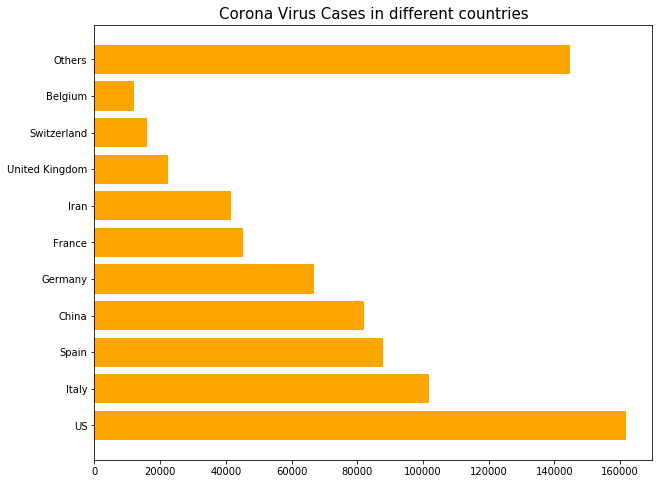

In [98]:
plt.figure(figsize=(10,8))
plt.barh(visual_unique_countries,visual_confirmed_cases,color='orange')
plt.title("Corona Virus Cases in different countries",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

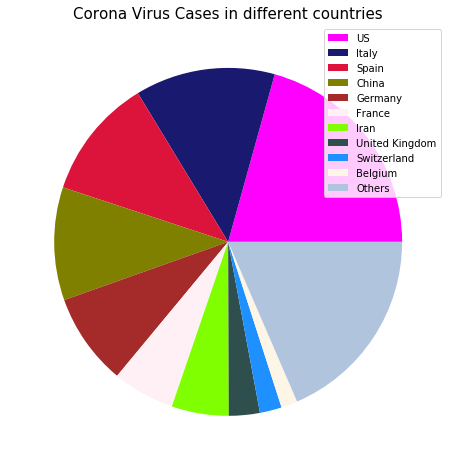

In [109]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,8))
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries,prop={'size':10})
plt.title("Corona Virus Cases in different countries",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()